In [1]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt
import matplotlib
#plt.rc('font',family='Times New Roman')
matplotlib.rcParams['font.family'] = 'Times New Roman'


def Hist_point(x, bin_width=0.3):
    division = np.arange(x.min(), x.max(), bin_width)
    hist, bin_edges = np.histogram(x, bins=division, density=False)

    Hist_x = []
    Hist_y = []

    for i in range(0, len(bin_edges)-1):
        for j in range(1, hist[i]+1):
            Hist_x.append((bin_edges[i]+bin_edges[i+1])/2)
            Hist_y.append(j)

    df = pd.DataFrame(dict(x=Hist_x, count=Hist_y))

    return df


df = pd.read_csv('Distribution_Data.csv')
df


,class,value
0,n,3.918358
1,n,2.556974
2,n,5.834538
3,n,2.255196
4,n,4.443104
...,...,...
395,mm,3.352823
396,mm,3.571257
397,mm,3.932318
398,mm,4.335818


In [2]:
# df['class']=df['class'].astype("category",categories= ["n", "s", "k", "mm"],ordered=True)
df['class'] = df['class'].astype("category").cat.set_categories([
    "n", "s", "k", "mm"], ordered=True)
df_all = pd.DataFrame(columns=['x', 'count', 'group'])
mean = []
median = []
group = ["n", "s", "k"]
for i in group:
    # np.random.normal(loc=5,scale=1,size=150)
    value = df.loc[df['class'] == i, 'value'].values
    df_temp = Hist_point(value)
    df_temp['group'] = i
    df_all = df_all.append(df_temp)

    mean.append(np.mean(value))
    median.append(np.median(value))

df_line = pd.DataFrame(dict(mean=mean, median=median, group=group))
df_all['count'] = df_all['count'].astype(int)

df_all


,x,count,group
0,0.078488,1,n
1,0.078488,2,n
2,0.678488,1,n
3,0.978488,1,n
4,0.978488,2,n
...,...,...,...
94,5.153806,1,k
95,5.153806,2,k
96,5.153806,3,k
97,5.453806,1,k


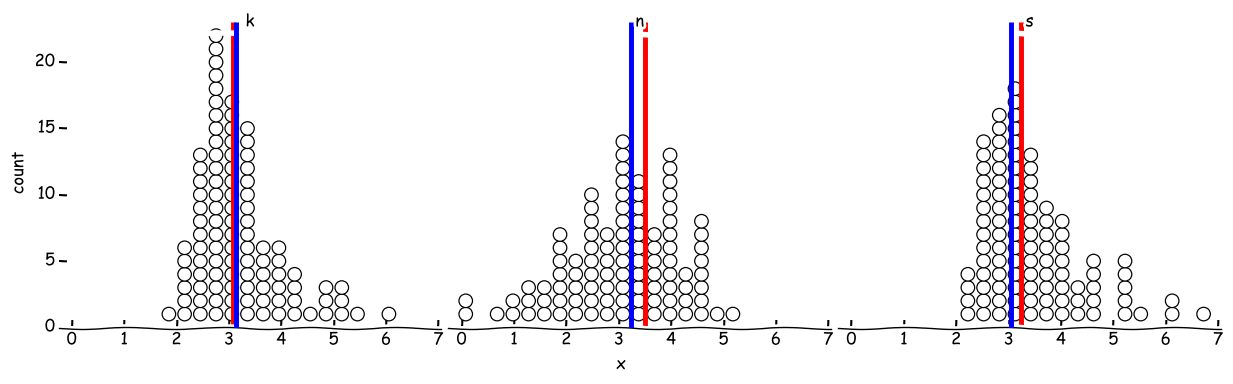

<ggplot: (132644173219)>


In [3]:
base_plot = (ggplot()
             + geom_point(df_all, aes(x='x', y='count'),
                          shape='o', size=5, color='k', fill='w')
             #+geom_density(df0,aes(x='x'),position = "stack",size=1,color='k',fill='none')
             + geom_vline(df_line, aes(xintercept=mean), colour='r', size=2)
             + geom_vline(df_line, aes(xintercept=median), colour='b', size=2)
             + scale_x_continuous(breaks=np.arange(0, 8, 1))
             + facet_wrap('~group')
             + theme_xkcd()
             + theme(# panel_background=element_rect(color="none"),
                strip_background=element_blank(),
                panel_border=element_line(color="none"),
                axis_line_x=element_line(color="k"),
                text=element_text(size=12, colour="black"),
                aspect_ratio=0.8,
                dpi=100,
                figure_size=(15, 15))
        )

print(base_plot)
# base_plot.save('简单统计函数.pdf')
